In [45]:
import pandas as pd
import numpy as np

In [46]:
# Read the file into a pandas DataFrame
TiO2 = pd.read_csv("TiO2_1000ms_1x.txt", 
                   delimiter='\t', skiprows=14, on_bad_lines='skip', 
                   names=['Wavelength (nm)', 'Intensity (a.u.)'], header=None)
print(TiO2.head())

   Wavelength (nm)  Intensity (a.u.)
0          345.118          -1243.80
1          345.334          -1243.80
2          345.550          -1243.80
3          345.767          -1208.98
4          345.983          -1284.76


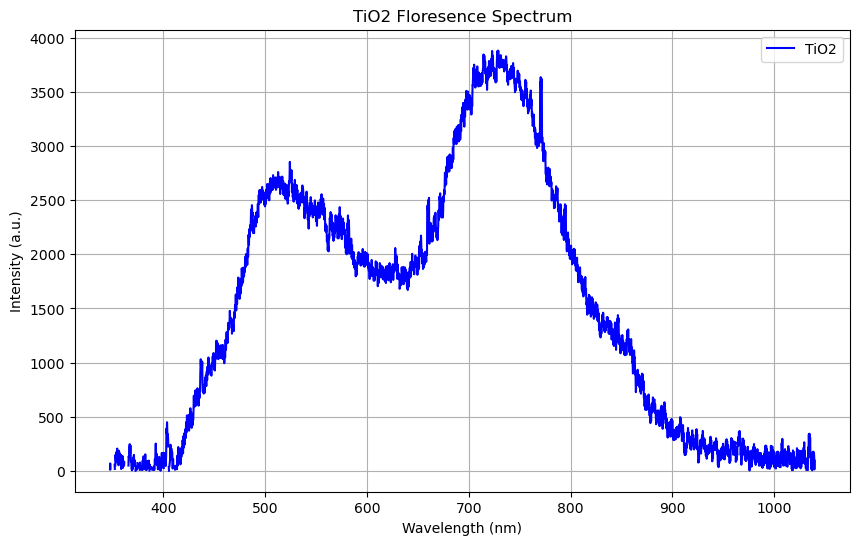

In [50]:
import matplotlib.pyplot as plt
    
# Apply a moving average to smooth the data
window_size = 10  # Adjust the window size for smoothing
smoothed_intensity = TiO2.iloc[:, 1].rolling(window=window_size, center=True).mean()
smoothed_intensity[smoothed_intensity < 0] = np.nan  # Replace negative values with NaN

# Plot the smoothed TiO2 data
plt.figure(figsize=(10, 6))
plt.plot(TiO2.iloc[:, 0], smoothed_intensity, label='TiO2', color='blue')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.title('TiO2 Floresence Spectrum')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
from scipy.signal import find_peaks

# Find peaks in the smoothed intensity data
peaks, _ = find_peaks(smoothed_intensity, height=0, distance=50)  # Adjust 'distance' as needed

# Use the already defined filtered_peaks variable
peaks = np.array(filtered_peaks)
# Filter peaks within the ranges of 500-600 nm and 700-800 nm
filtered_peaks_in_range_500_600 = [peak for peak in peaks if 500 <= TiO2.iloc[peak, 0] <= 600]
filtered_peaks_in_range_700_800 = [peak for peak in peaks if 700 <= TiO2.iloc[peak, 0] <= 800]

# Find the indices of the 4 highest peaks within each range
top_peaks_in_range_500_600 = np.array(filtered_peaks_in_range_500_600)[
    np.argsort(smoothed_intensity.iloc[filtered_peaks_in_range_500_600])[-4:]
]
top_peaks_in_range_700_800 = np.array(filtered_peaks_in_range_700_800)[
    np.argsort(smoothed_intensity.iloc[filtered_peaks_in_range_700_800])[-4:]
]

# Print the wavelengths and intensities of the top 4 peaks in each range
print("Top peaks in the range 500-600 nm:")
for peak in top_peaks_in_range_500_600:
    wavelength = TiO2.iloc[peak, 0]
    intensity = smoothed_intensity.iloc[peak]
    print(f"Peak at Wavelength: {wavelength:.2f} nm, Intensity: {intensity:.2f}")

print("\nTop peaks in the range 700-800 nm:")
for peak in top_peaks_in_range_700_800:
    wavelength = TiO2.iloc[peak, 0]
    intensity = smoothed_intensity.iloc[peak]
    print(f"Peak at Wavelength: {wavelength:.2f} nm, Intensity: {intensity:.2f}")

Top peaks in the range 500-600 nm:
Peak at Wavelength: 536.52 nm, Intensity: 2636.28
Peak at Wavelength: 501.90 nm, Intensity: 2648.98
Peak at Wavelength: 512.65 nm, Intensity: 2760.39
Peak at Wavelength: 524.20 nm, Intensity: 2854.18

Top peaks in the range 700-800 nm:
Peak at Wavelength: 704.49 nm, Intensity: 3722.73
Peak at Wavelength: 743.51 nm, Intensity: 3767.17
Peak at Wavelength: 714.50 nm, Intensity: 3846.22
Peak at Wavelength: 729.05 nm, Intensity: 3881.24


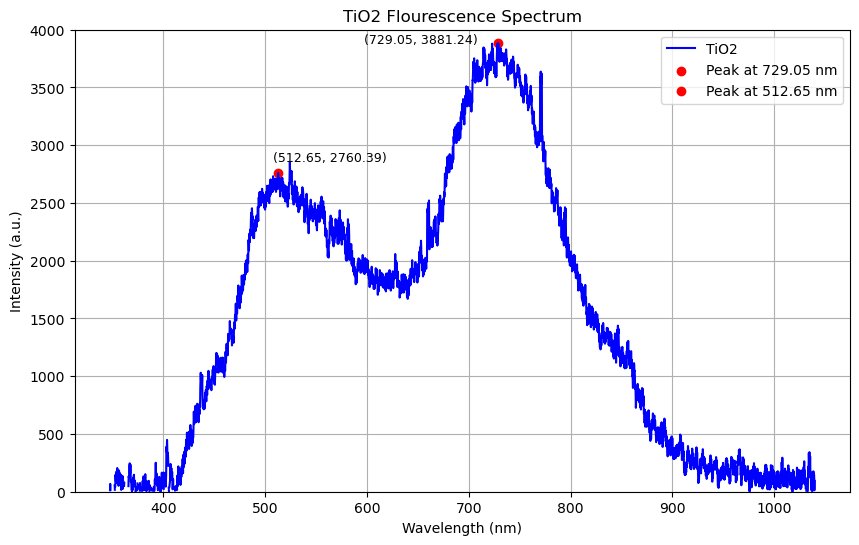

In [55]:
# Save the peaks in a list
peaks = [729.05, 512.65]

# Extract the corresponding intensities from the data
intensities = [smoothed_intensity.iloc[(TiO2['Wavelength (nm)'] - peak).abs().idxmin()] for peak in peaks]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(TiO2['Wavelength (nm)'], smoothed_intensity, label='TiO2', color='blue')

# Highlight the peaks
for peak, intensity in zip(peaks, intensities):
    plt.scatter(peak, intensity, color='red', label=f'Peak at {peak:.2f} nm')
    if peak == 729.05:
        plt.text(peak - 20, intensity, f'({peak:.2f}, {intensity:.2f})', fontsize=9, color='black', ha='right')  # Adjusted position
    else:
        plt.text(peak - 5, intensity + 100, f'({peak:.2f}, {intensity:.2f})', fontsize=9, color='black')  # Adjusted position

# Add labels, title, and legend
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (a.u.)')
plt.title('TiO2 Flourescence Spectrum')
plt.ylim(0, 4000)  # Set the intensity range
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Constants
h = 6.62607015e-34  # Planck's constant (Joule·seconds)
c = 3e8  # Speed of light (meters/second)

# Convert wavelength from nm to meters
wavelength_m = TiO2['Wavelength (nm)'] * 1e-9

# Calculate energy (E = hc / lambda)
TiO2['Energy (J)'] = (h * c) / wavelength_m

# Calculate the Jacobian and add it as a new column
TiO2['Jacobian'] = (TiO2['Intensity (a.u.)'] * h * c) / (TiO2['Energy (J)'] ** 2)

# Print the transformed DataFrame
print(TiO2.head())

   Wavelength (nm)  Intensity (a.u.)    Energy (J)      Jacobian
0          345.118          -1243.80  5.759830e-19 -7.452612e+14
1          345.334          -1243.80  5.756227e-19 -7.461943e+14
2          345.550          -1243.80  5.752629e-19 -7.471281e+14
3          345.767          -1208.98  5.749019e-19 -7.271247e+14
4          345.983          -1284.76  5.745430e-19 -7.736673e+14


In [64]:
# Transform the coordinates of the peaks
transformed_peaks = []
for peak in [512.65, 729.05]:
    # Find the closest index for the peak
    idx = (TiO2['Wavelength (nm)'] - peak).abs().idxmin()
    energy = TiO2['Energy (J)'].iloc[idx]
    jacobian = smoothed_jacobian.iloc[idx]
    transformed_peaks.append((energy, jacobian))

# Print the transformed coordinates
print("Transformed coordinates (Energy, Jacobian):")
for energy, jacobian in transformed_peaks:
    print(f"Energy: {energy:.2e} J, Jacobian: {jacobian:.2e}")

Transformed coordinates (Energy, Jacobian):
Energy: 3.88e-19 J, Jacobian: 3.65e+15
Energy: 2.73e-19 J, Jacobian: 1.04e+16


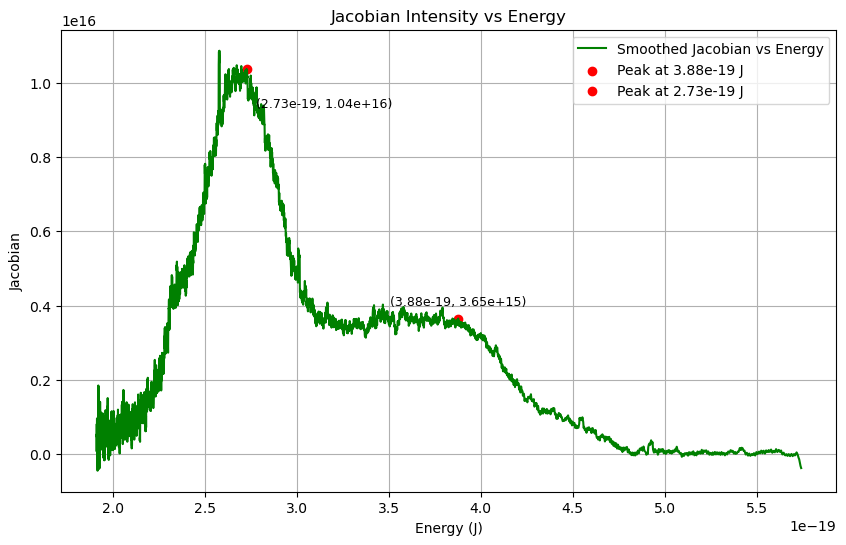

In [67]:
# Apply a moving average to smooth the Jacobian data
smoothed_jacobian = TiO2['Jacobian'].rolling(window=10, center=True).mean()

# Plot the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(TiO2['Energy (J)'], smoothed_jacobian, label='Smoothed Jacobian vs Energy', color='green')
# Highlight the transformed peaks
for energy, jacobian in transformed_peaks:
    plt.scatter(energy, jacobian, color='red', label=f'Peak at {energy:.2e} J')
    if energy == 2.7265983103993146e-19:  # Specific adjustment for the problematic label
        plt.text(energy + 0.05e-19, jacobian * 0.9, f'({energy:.2e}, {jacobian:.2e})', 
                 fontsize=9, color='black', ha='left')  # Adjusted position to the right and inside
    else:
        plt.text(energy, jacobian * 1.1, f'({energy:.2e}, {jacobian:.2e})', 
                 fontsize=9, color='black', ha='center')

# Add labels, title, and legend
plt.xlabel('Energy (J)')
plt.ylabel('Jacobian')
plt.title('Jacobian Intensity vs Energy')
plt.legend()
plt.grid(True)
plt.show()

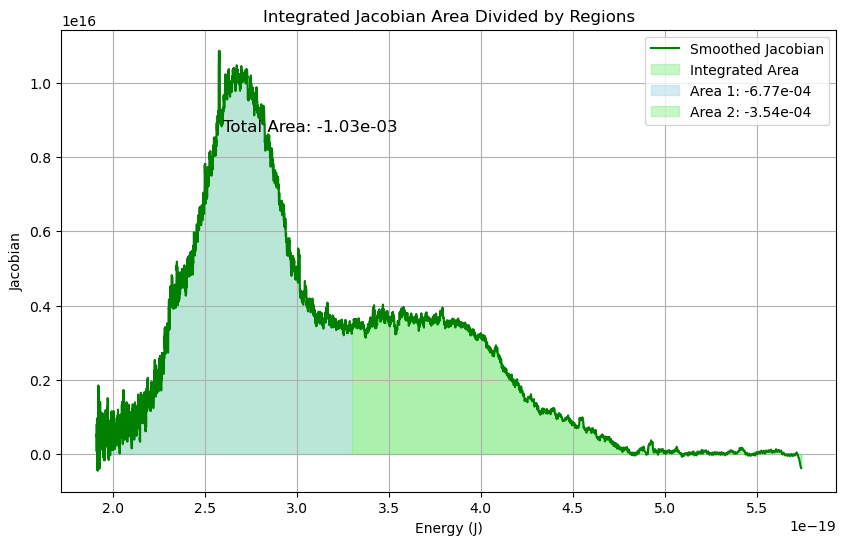

In [74]:
# Plot the smoothed Jacobian data
plt.figure(figsize=(10, 6))
plt.plot(energy_values, jacobian_values, label='Smoothed Jacobian', color='green')

# Highlight the integrated area
plt.fill_between(energy_values, jacobian_values, color='lightgreen', alpha=0.5, label='Integrated Area')

# Define the boundaries for Area 1 and Area 2
boundary_1 = 2e-19  # Start of Area 1
boundary_2 = 3.3e-19  # End of Area 1 and start of Area 2

# Find indices for the two regions
region_1_indices = (energy_values >= boundary_1) & (energy_values <= boundary_2)
region_2_indices = energy_values > boundary_2

# Calculate the integrated areas for each region
area_1 = np.trapz(jacobian_values[region_1_indices], energy_values[region_1_indices])
area_2 = np.trapz(jacobian_values[region_2_indices], energy_values[region_2_indices])

# Highlight the two regions with different colors
plt.fill_between(energy_values[region_1_indices], jacobian_values[region_1_indices], 
                 color='lightblue', alpha=0.5, label=f'Area 1: {area_1:.2e}')
plt.fill_between(energy_values[region_2_indices], jacobian_values[region_2_indices], 
                 color='lightgreen', alpha=0.5, label=f'Area 2: {area_2:.2e}')

# Add the total area label
total_area = area_1 + area_2
plt.text(energy_values.mean(), jacobian_values.max() * 0.8, 
         f'Total Area: {total_area:.2e}', fontsize=12, color='black', ha='center')

# Add labels, title, and legend
plt.xlabel('Energy (J)')
plt.ylabel('Jacobian')
plt.title('Integrated Jacobian Area Divided by Regions')
plt.legend()
plt.grid(True)
plt.show()
